In [1]:
psrname='J1022+1001'

In [2]:
EPTA_dir='/home/subhajit/EPTA_ONLY/'+psrname+'/results/'
EINPTA_dir='/home/subhajit/EPTA+INPTA/'+psrname+'/results/'

In [3]:
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd

2023-03-17 18:36:02.120346: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-17 18:36:02.425783: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-17 18:36:02.426956: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 18:36:03.351943: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
epta_1=np.loadtxt(EPTA_dir+'TNfinal-'+psrname+'-post_equal_weights.dat')
par_epta=pd.read_csv(EPTA_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
len_epta=len(par_epta)
epta_2=epta_1.T

In [5]:
einpta_1=np.loadtxt(EINPTA_dir+'TNfinal-'+psrname+'-post_equal_weights.dat')
par_einpta=pd.read_csv(EINPTA_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
len_einpta=len(par_einpta)
einpta_2=einpta_1.T

In [6]:
epta_arr=[epta_2[len(par_epta)-4],epta_2[len(par_epta)-3],epta_2[len(par_epta)-2],epta_2[len(par_epta)-1]]

einpta_arr=[einpta_2[len(par_einpta)-4],einpta_2[len(par_einpta)-3],einpta_2[len(par_einpta)-2],einpta_2[len(par_einpta)-1]]

In [7]:
names = ['rn_logA','rn_gamma','dm_logA','dm_gamma']
labels=['\log A_R','\gamma_R', '\log A_{DM}','\gamma_{DM}']
del_names=['delta_logA','delta_gamma']

In [8]:
epta=MCSamples(samples=np.array(epta_arr).transpose(),loglikes=epta_2[-1],names=names,labels=labels,label='EPTA')
einpta=MCSamples(samples=np.array(einpta_arr).transpose(),loglikes=einpta_2[-1],names = names,labels=labels,label='EPTA+INPTA \n'+psrname)

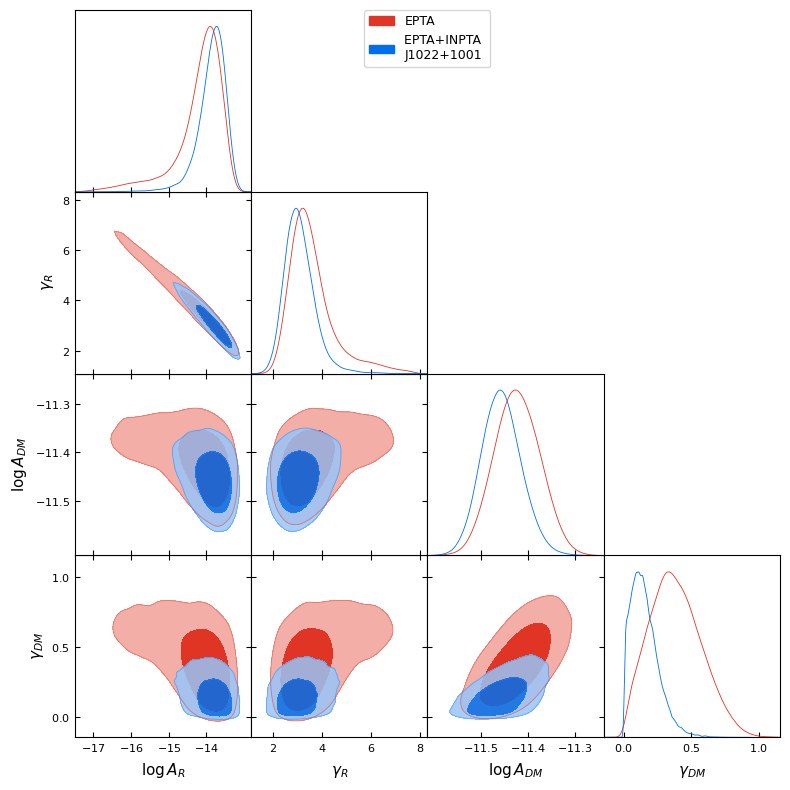

In [9]:
g = plots.get_subplot_plotter()
g.triangle_plot([epta,einpta], filled=True)
plt.savefig(psrname+'_R_DM.png',dpi=300)

In [10]:
from diff_chain import  Diff_chain_shift

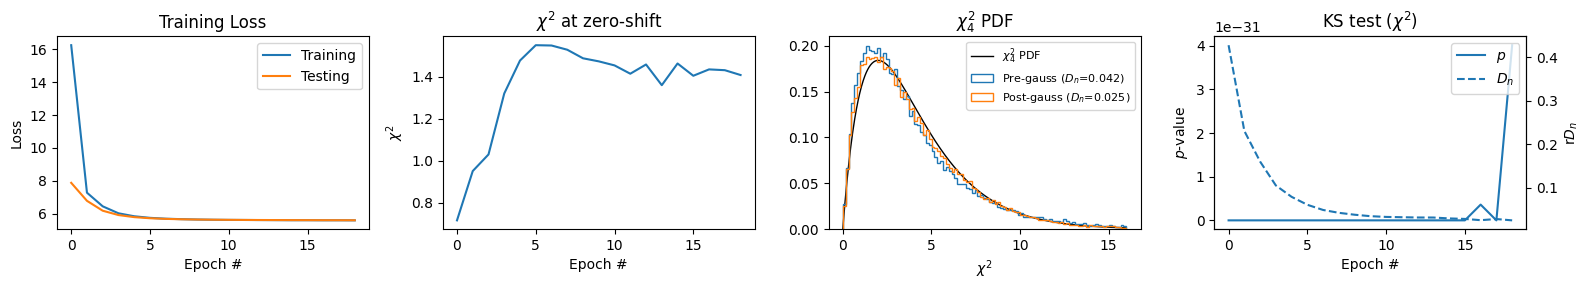

64/64 [==============================] - 2s 29ms/step - loss: 5.5874 - val_loss: 5.5937 - shift0_chi2: 1.4080 - shift0_pval: 0.1572 - shift0_nsigma: 0.1983 - chi2Z_ks: 0.0249 - chi2Z_ks_p: 4.0109e-31 - lr: 0.0100
Epoch 20/50
23/64 [=========>....................] - ETA: 0s - loss: 5.5885

In [ ]:
diff_chain, shift_probability, shift_lower, shift_upper=Diff_chain_shift(epta,einpta)

In [ ]:
g = plots.get_subplot_plotter()
nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain, filled=True,legend_labels = ['SPNTA: '+psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
plt.savefig(psrname+'_diff_SPNTA.png',dpi=300)